In [1]:
library(spacexr)
library(Matrix)
library(doParallel)
library(ggplot2)

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [2]:
data_folder <- '../../data'
outputs_folder <- '../../outputs'

In [3]:
datadir <- file.path(data_folder, 'cside_preparations', '9hr_avr')
### mk directory for outputs
if (!dir.exists(file.path(outputs_folder, 'CSIDE_outputs'))) {
  dir.create(file.path(outputs_folder, 'CSIDE_outputs'))
}
savedir <- file.path(outputs_folder, 'CSIDE_outputs', 'RCTD_results_9hr')

In [4]:
dir.create(savedir)

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 13505

process_cell_type_info: number of genes in reference: 32700




   0    1    2 
2084 1901 9520 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.3 GiB”
End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: 0 found DE genes: 31

get_de_genes: 1 found DE genes: 35

get_de_genes: 2 found DE genes: 29

get_de_genes: total DE genes: 53

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes: 0 found DE genes: 31

get_de_genes: 1 found DE genes: 35

get_de_genes: 2 found DE genes: 29

get_de_genes: total DE genes: 53

fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 85978.530981635

Sigma value:  0.84

Likelihood value: 85453.8215277092

Sigma value:  0.8

Likelihood value: 85411.4320386677

Sigma value:  0.78

Likelihood value: 85406.8587310823

Sigma value:  0.78



[1] "gather_results: finished 1000"
[1] "gather_results: finished 2000"
[1] "gather_results: finished 3000"
[1] "gather_results: finished 4000"
[1] "gather_results: finished 5000"
[1] "gather_results: finished 6000"
[1] "gather_results: finished 7000"
[1] "gather_results: finished 8000"
[1] "gather_results: finished 9000"
[1] "gather_results: finished 10000"
[1] "gather_results: finished 11000"
[1] "gather_results: finished 12000"
[1] "gather_results: finished 13000"
[1] "gather_results: finished 14000"
[1] "gather_results: finished 15000"
[1] "gather_results: finished 16000"
[1] "gather_results: finished 17000"
[1] "gather_results: finished 18000"
[1] "gather_results: finished 19000"
[1] "gather_results: finished 20000"
[1] "gather_results: finished 21000"
[1] "gather_results: finished 22000"
[1] "gather_results: finished 23000"
[1] "gather_results: finished 24000"
[1] "gather_results: finished 25000"
[1] "gather_results: finished 26000"
[1] "gather_results: finished 27000"


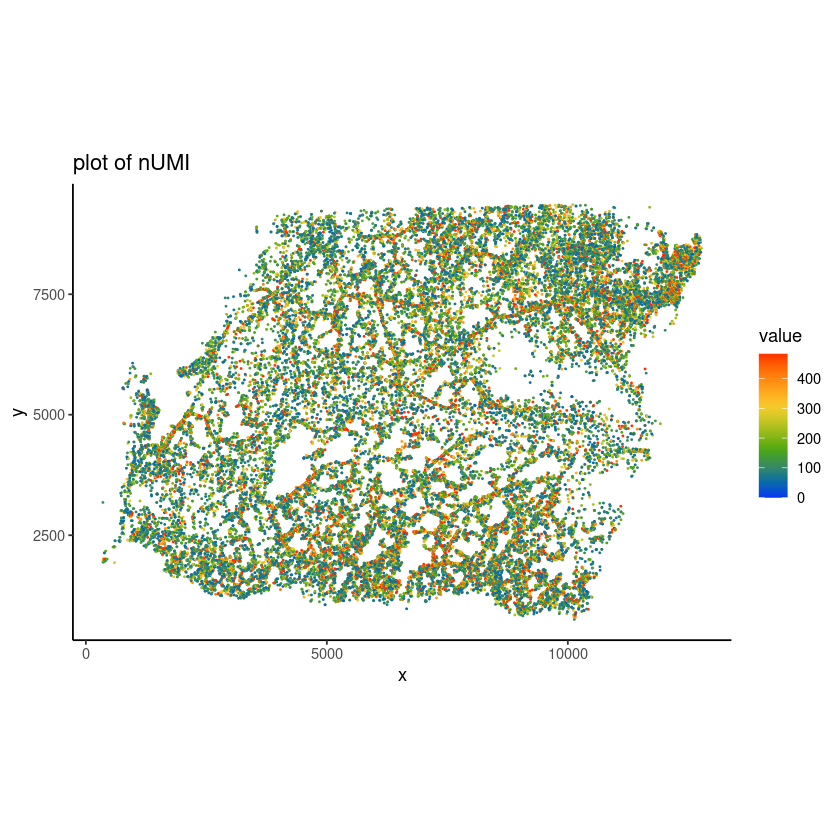

In [5]:

counts <- read.csv(file.path(datadir,"counts.csv")) # load in counts matrix
coords <- read.csv(file.path(datadir,"coords.csv"))
rownames(counts) <- counts[,1]; counts[,1] <- NULL # Move first column to rownames
rownames(coords) <- coords$barcodes; coords$barcodes <- NULL # Move barcodes to rownames
nUMI <- colSums(counts) # In this case, total counts per pixel is nUMI
puck <- SpatialRNA(coords, counts, nUMI)
barcodes <- colnames(puck@counts) # pixels to be used (a list of barcode names). 
plot_puck_continuous(puck, barcodes, puck@nUMI, ylimit = c(0,round(quantile(puck@nUMI,0.9))), 
                   title ='plot of nUMI') 

refdir <- file.path(data_folder, 'cside_preparations', 'scrna')
counts <- read.csv(file.path(refdir,"dge.csv")) # load in counts matrix
rownames(counts) <- counts[,1]; counts[,1] <- NULL # Move first column to rownames
meta_data <- read.csv(file.path(refdir,"meta_data.csv")) # load in meta_data (barcodes, clusters, and nUMI)
cell_types <- meta_data$cluster; names(cell_types) <- meta_data$barcode # create cell_types named list
cell_types <- as.factor(cell_types) # convert to factor data type
nUMI <- meta_data$nUMI; names(nUMI) <- meta_data$barcode # create nUMI named list
reference <- Reference(counts, cell_types, nUMI, min_UMI = 15)
myRCTD <- create.RCTD(puck, reference, max_cores = 16, gene_cutoff = 0.0001, gene_cutoff_reg = 0.0001, fc_cutoff = -3, fc_cutoff_reg = -3)
myRCTD <- run.RCTD(myRCTD, doublet_mode = 'doublet')
saveRDS(myRCTD,file.path(savedir,'myRCTD.rds'))


In [6]:
t_var <- read.csv(file.path(datadir,"axis.csv"))
t_var <-setNames(t_var$Smoothed, t_var$X)

X9hr_avr1_3 X9hr_avr2_3 X9hr_avr3_3 X9hr_avr4_2 X9hr_avr5_3 X9hr_avr6_3 
  0.4000118   0.4000118   0.4000118   0.4000118   0.4000118   0.4000118 


Warning message:
“Removed 10563 rows containing missing values (`geom_point()`).”


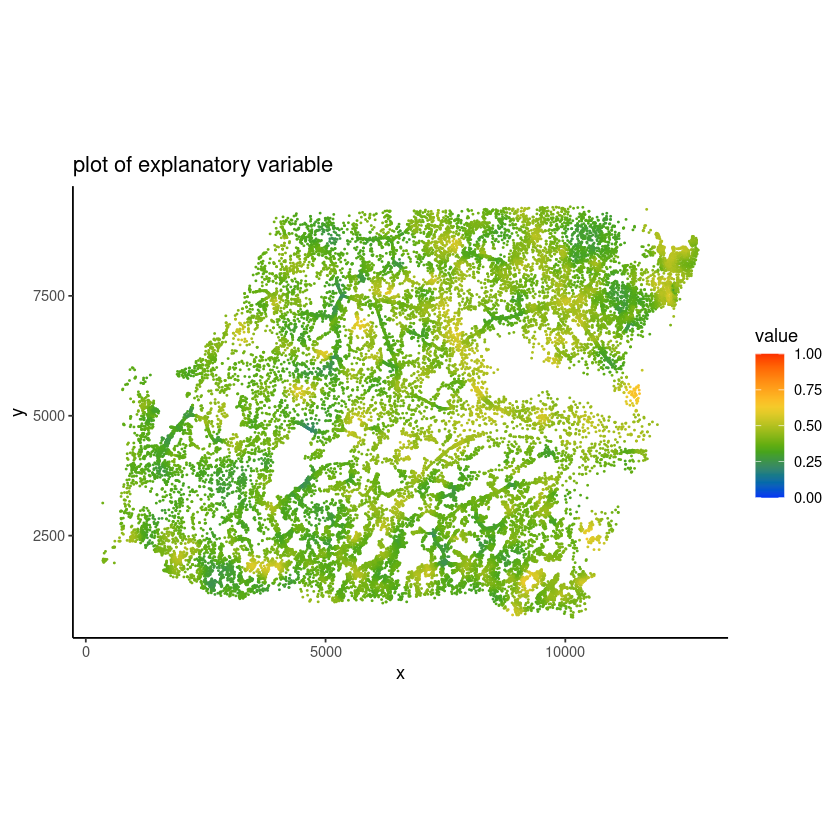

In [7]:
### Create SpatialRNA object
myRCTD <- readRDS(file.path(savedir,'myRCTD.rds'))
set.seed(12345)
explanatory.variable <- t_var
print(head(explanatory.variable))

plot_puck_continuous(myRCTD@spatialRNA, names(explanatory.variable), explanatory.variable, ylimit = c(0, 1), title ='plot of explanatory variable') 

In [8]:
#de
myRCTD@config$max_cores <- 16
myRCTD <- run.CSIDE.single(myRCTD, explanatory.variable, 
                        cell_type_threshold = 0) 

saveRDS(myRCTD,file.path(savedir,'myRCTDde.rds'))

Warning message in run.CSIDE.general(myRCTD, X1, X2, barcodes, cell_types, cell_type_threshold = cell_type_threshold, :
“run.CSIDE.general: some parameters are set to the CSIDE vignette values, which are intended for testing but not proper execution. For more accurate results, consider using the default parameters to this function.”


run.CSIDE.general: running CSIDE with cell types 0, 1, 2

run.CSIDE.general: configure params_to_test = 2, 

filter_genes: filtering genes based on threshold = 5e-05

set_global_Q_all: begin

set_global_Q_all: finished



In [9]:
#print results for cell type Mesophyll ('2')
cell_type <- '2'
results_de <- myRCTD@de_results$sig_gene_list[[cell_type]]
print(results_de)

            Z_score     log_fc         se paramindex_best conv         p_val
PNSL2     68.279565 -4.7110554 0.06899656               2 TRUE  0.000000e+00
AT1G18060 46.837062 -2.8536912 0.06092806               2 TRUE  0.000000e+00
FMO1      43.541760  7.5543171 0.17349591               2 TRUE  0.000000e+00
AT1G22630 38.434899 -3.7581568 0.09777980               2 TRUE  0.000000e+00
AT-GTL1   42.465595 -3.5715763 0.08410518               2 TRUE  0.000000e+00
AT1G49010 48.506511 -4.7050755 0.09699885               2 TRUE  0.000000e+00
SVP       51.964361 -2.7532694 0.05298380               2 TRUE  0.000000e+00
MYB15     52.444861  5.3901740 0.10277792               2 TRUE  0.000000e+00
MPT2      45.771387  6.4278586 0.14043399               2 TRUE  0.000000e+00
AT4G28025 38.261016 -2.6240623 0.06858318               2 TRUE  0.000000e+00
BAK1      42.559767  2.0410083 0.04795628               2 TRUE  0.000000e+00
PNSL4     61.797215 -3.8830621 0.06283555               2 TRUE  0.000000e+00

In [10]:
myRCTD <- readRDS(file.path(savedir,'myRCTDde.rds'))
#plot_gene_two_regions(myRCTD, sig_gene, cell_type)

In [11]:
make_all_de_plots(myRCTD, savedir)